In [3]:
pip install ucimlrepo

# Importing and EDA

The following box of code is to acces the dataset from the original source. If any issue arises, use the code provided in the second box to read the csv

In [202]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# Total Dataset
X_column_names = X.columns.tolist()
y_column_names = y.columns.tolist()

column_names = X_column_names + y_column_names
my_df = pd.DataFrame(np.column_stack((X, y)), columns=column_names)

my_df = my_df[my_df['Target'] != 'Enrolled']

# Transform 'Target' to numeric
mapping = {'Dropout': 0, 'Graduate': 1}
my_df['Target'] = my_df['Target'].map(mapping)

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [232]:
# In case the dataset in not accesibel with the code above
# Then run this code to access the dataset

# my_df = pd.read_csv("/Users/giovannighedini/Desktop/my_data.csv")
# my_df = my_df[my_df['Target'] != 'Enrolled']
# mapping = {'Dropout': 0, 'Graduate': 1}
# my_df['Target'] = my_df['Target'].map(mapping)

In [203]:
my_df['Target'].unique()

array([0, 1])

In [204]:
my_df.dtypes

Marital Status                                    object
Application mode                                  object
Application order                                 object
Course                                            object
Daytime/evening attendance                        object
Previous qualification                            object
Previous qualification (grade)                    object
Nacionality                                       object
Mother's qualification                            object
Father's qualification                            object
Mother's occupation                               object
Father's occupation                               object
Admission grade                                   object
Displaced                                         object
Educational special needs                         object
Debtor                                            object
Tuition fees up to date                           object
Gender                         

In [205]:
# Tranform dtypes to numeric
my_df = my_df.apply(pd.to_numeric, errors='coerce')

In [206]:
my_df.describe(include='all')

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


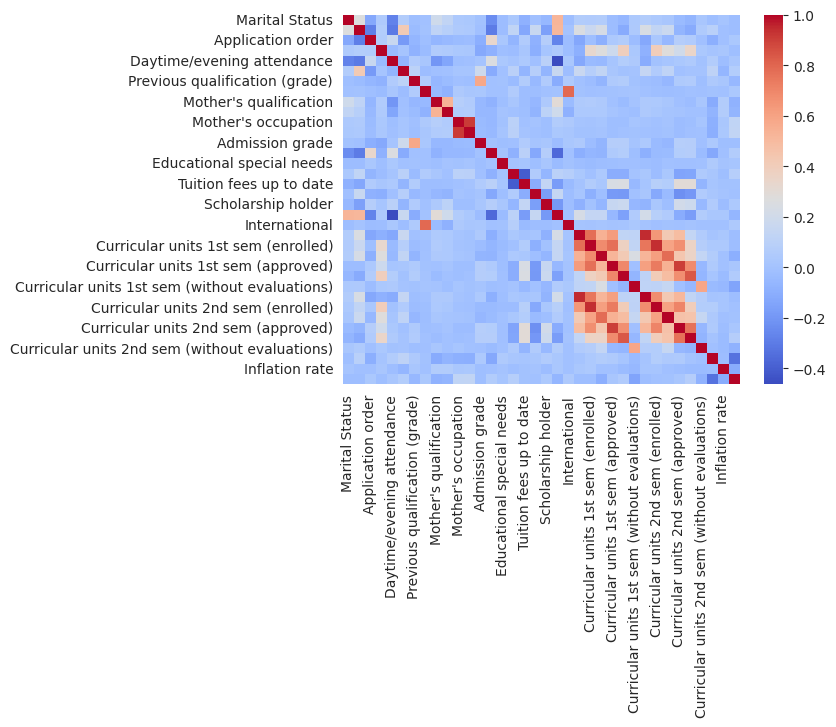

In [207]:
import matplotlib.pyplot as plt

correlation_matrix = X.corr()
f, ax = plt.subplots()

sns.heatmap(correlation_matrix, cmap='coolwarm');

In [208]:
from sklearn.model_selection import train_test_split

X = my_df.drop(columns=['Target'])
y = my_df['Target']

In [209]:
y.describe()

count    3630.000000
mean        0.608540
std         0.488144
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Target, dtype: float64

# Feature Engineering and Selection

In [174]:
# Create polynomial features. Similar to what we did in linear regression.

from sklearn import preprocessing

pf = preprocessing.PolynomialFeatures(
    degree = 2, # [1, a, b, a^2, ab, b^2]
    include_bias=False
)

# apply to the features
pf.fit(X)

# create polynomial features and create new dataframe
poly_feats = pf.transform(X)

# Get number of features
num_feats = poly_feats.shape[1]

df_transformed = pd.DataFrame(poly_feats, columns=[f'f_{i}' for i in range(1,num_feats+1)])

df_transformed.head()

# Can create third-degree, fourth-degree, etc. polynomial features

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_693,f_694,f_695,f_696,f_697,f_698,f_699,f_700,f_701,f_702
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,116.64,15.12,18.792,1.96,2.436,3.0276
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,-0.0,0.0,193.21,-4.17,10.981,0.09,-0.237,0.6241
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.0,0.0,0.0,116.64,15.12,18.792,1.96,2.436,3.0276
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,0.0,-0.0,-0.0,88.36,-7.52,-29.328,0.64,2.496,9.7344
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,0.0,-0.0,0.0,193.21,-4.17,10.981,0.09,-0.237,0.6241


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(len(df_transformed.columns) - 1):
    column1 = df_transformed.columns[i]

    if i + 1 < len(df_transformed.columns):
        column2 = df_transformed.columns[i+1]
    else:
        break  # Exit the loop if we reach the last column

    correlation_value = df_transformed[column1].corr(df_transformed[column2])

    if abs(correlation_value) > 0.7:
        df_transformed.drop(columns=[column1], inplace=True)

In [176]:
X = df_transformed

In [177]:
X.shape

(3630, 561)

In [113]:
# Use SelectFromModel, a very sophisticated general function
# Can be used for both regressors and classifiers

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

model = RandomForestClassifier()

model.fit(X,y)

sfm = SelectFromModel(estimator=model)
X_transformed=sfm.fit_transform(X,y)

col_names = X.columns.tolist()

selected_features_mask = sfm.get_support()

selected_features_names = [col_names[i] for i in range(len(col_names)) if selected_features_mask[i]]

print(selected_features_names)

['f_4', 'f_13', 'f_17', 'f_26', 'f_32', 'f_53', 'f_59', 'f_61', 'f_62', 'f_68', 'f_78', 'f_88', 'f_94', 'f_101', 'f_103', 'f_112', 'f_122', 'f_131', 'f_135', 'f_137', 'f_142', 'f_144', 'f_145', 'f_146', 'f_147', 'f_148', 'f_151', 'f_155', 'f_158', 'f_161', 'f_164', 'f_167', 'f_168', 'f_170', 'f_172', 'f_202', 'f_226', 'f_227', 'f_232', 'f_233', 'f_244', 'f_248', 'f_254', 'f_257', 'f_260', 'f_261', 'f_263', 'f_277', 'f_286', 'f_292', 'f_305', 'f_332', 'f_347', 'f_358', 'f_373', 'f_383', 'f_398', 'f_407', 'f_410', 'f_413', 'f_414', 'f_416', 'f_419', 'f_422', 'f_493', 'f_496', 'f_500', 'f_502', 'f_506', 'f_508', 'f_510', 'f_554', 'f_559', 'f_560', 'f_562', 'f_604', 'f_606', 'f_607', 'f_613', 'f_614', 'f_619', 'f_620', 'f_626', 'f_629', 'f_631', 'f_632', 'f_634', 'f_637', 'f_641', 'f_643', 'f_645', 'f_670', 'f_672', 'f_676', 'f_683', 'f_685', 'f_687', 'f_688', 'f_690']


In [114]:
# Keeping only relevant features
feature_names = selected_features_names

X = X[feature_names]

In [210]:
X.shape

(3630, 36)

In [211]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

# Logistic Regression

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the logistic regression model
model = LogisticRegression(multi_class='auto', max_iter=1000)  # Using default parameters
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logreg)

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8925619834710744
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       147
           1       0.89      0.94      0.91       216

    accuracy                           0.89       363
   macro avg       0.89      0.88      0.89       363
weighted avg       0.89      0.89      0.89       363



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# If there are categorical features, encode them using LabelEncoder
label_encoders = {}
for column in my_df.columns:
    if my_df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        my_df[column] = label_encoders[column].fit_transform(my_df[column])


# Create and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8402203856749312
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       147
           1       0.87      0.86      0.86       216

    accuracy                           0.84       363
   macro avg       0.83      0.84      0.83       363
weighted avg       0.84      0.84      0.84       363



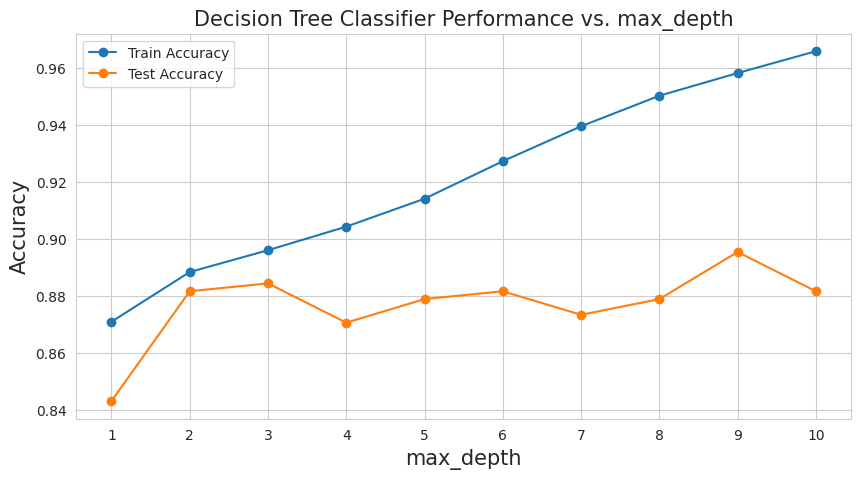

Optimal depth: 9


In [213]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Initialize lists to store accuracy scores
accuracy_train_list = []
accuracy_test_list = []

# Range of max_depth values to search
depth_range = range(1, 11)

for depth in depth_range:
    # Create and train the decision tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plot the accuracy scores for different max_depth values
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(depth_range, accuracy_train_list, label="Train Accuracy", marker='o')
plt.plot(depth_range, accuracy_test_list, label="Test Accuracy", marker='o')
plt.xlabel("max_depth", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("Decision Tree Classifier Performance vs. max_depth", size=15)
plt.xticks(depth_range)
plt.legend()
plt.show()

# Find the optimal depth
optimal_depth = depth_range[np.argmax(accuracy_test_list)]
print("Optimal depth:", optimal_depth)


Decision tree max_depth=5 accuracy - training set: 0.9
Decision tree max_depth=5 accuracy - testing set: 0.88


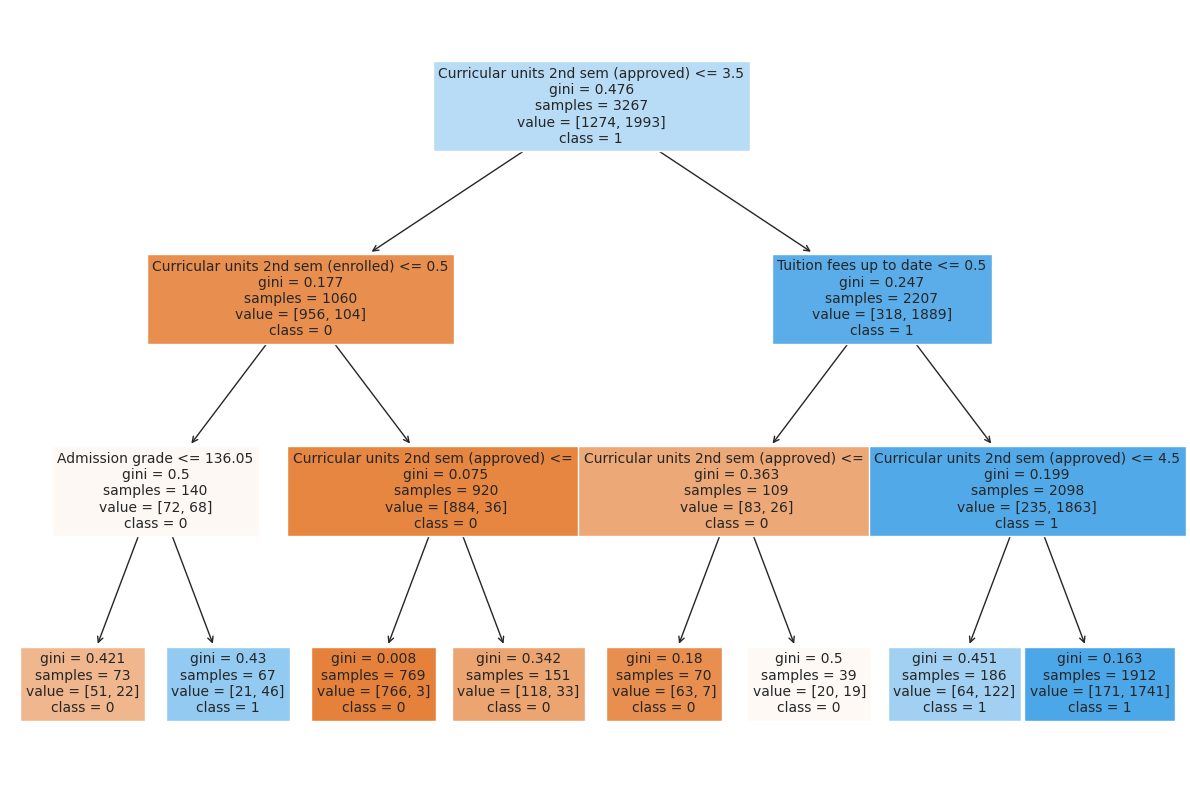

In [214]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train the decision tree classifier with max_depth=5
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Compute accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test_tree = accuracy_score(y_test, y_test_pred)

print('Decision tree max_depth=5 accuracy - training set:', round(accuracy_train, 2))
print('Decision tree max_depth=5 accuracy - testing set:', round(accuracy_test_tree, 2))

# Convert class labels to strings
class_names = y.unique().astype(str)

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=class_names, fontsize=10, filled=True)
plt.show()

In [215]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree classifier with min_weight_fraction_leaf=0.1
dtc_mfl10 = DecisionTreeClassifier(max_depth=5, min_weight_fraction_leaf=0.1, random_state=42)
dtc_mfl10.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = dtc_mfl10.predict(X_train)
y_test_pred = dtc_mfl10.predict(X_test)

# Compute accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decision tree min_leaf=10%. Accuracy - training set:', round(accuracy_train, 2))
print('Decision tree min_leaf=10%. Accuracy - testing set:', round(accuracy_test, 2))
print('Depth of the decision tree:', dtc_mfl10.get_depth())


Decision tree min_leaf=10%. Accuracy - training set: 0.87
Decision tree min_leaf=10%. Accuracy - testing set: 0.84
Depth of the decision tree: 5


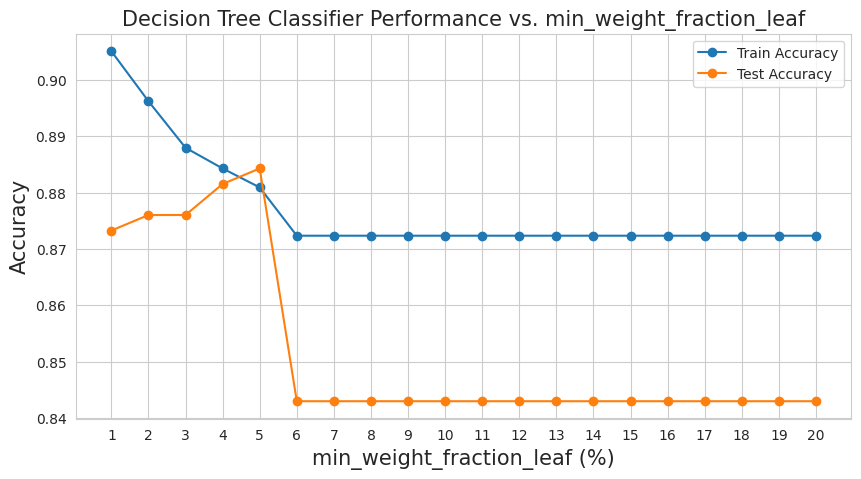

Best value for min_weight_fraction_leaf: 5 %


In [ ]:
# Initialize lists to store accuracy scores
accuracy_train_list = []
accuracy_test_list = []

# Range of min_weight_fraction_leaf values to search (from 1% to 20%)
min_weight_fraction_leaf_range = range(1, 21)

for min_leaf in min_weight_fraction_leaf_range:
    # Create and train the decision tree classifier
    dtc = DecisionTreeClassifier(min_weight_fraction_leaf=min_leaf/100, random_state=42)
    dtc.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plot the accuracy scores for different min_weight_fraction_leaf values
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(min_weight_fraction_leaf_range, accuracy_train_list, label="Train Accuracy", marker='o')
plt.plot(min_weight_fraction_leaf_range, accuracy_test_list, label="Test Accuracy", marker='o')
plt.xlabel("min_weight_fraction_leaf (%)", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("Decision Tree Classifier Performance vs. min_weight_fraction_leaf", size=15)
plt.xticks(min_weight_fraction_leaf_range)
plt.legend()
plt.show()

# Find the best value for min_weight_fraction_leaf based on the maximum test accuracy
best_min_weight_fraction_leaf = min_weight_fraction_leaf_range[accuracy_test_list.index(max(accuracy_test_list))]
print("Best value for min_weight_fraction_leaf:", best_min_weight_fraction_leaf, "%")


In [ ]:
# Create and train the decision tree classifier with min_weight_fraction_leaf=0.07
dtc_mfl07 = DecisionTreeClassifier(min_weight_fraction_leaf=0.05, random_state=42)
dtc_mfl07.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = dtc_mfl07.predict(X_train)
y_test_pred = dtc_mfl07.predict(X_test)

# Compute accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decision tree min_leaf=7%. Accuracy - training set:', round(accuracy_train, 2))
print('Decision tree min_leaf=7%. Accuracy - testing set:', round(accuracy_test, 2))
print('Depth of the decision tree:', dtc_mfl07.get_depth())


Decision tree min_leaf=7%. Accuracy - training set: 0.88
Decision tree min_leaf=7%. Accuracy - testing set: 0.88
Depth of the decision tree: 9


In [ ]:
# set min_impurity_decrease to 0.1

dtc_mid1 = DecisionTreeClassifier(min_impurity_decrease = 0.1, random_state=42)

dtc_mid1.fit(X_train, y_train)

y_train_pred = dtc_mid1.predict(X_train)
y_test_pred = dtc_mid1.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decison tree min_impurity_decrease=0.1. Accuracy - training set', round(accuracy_train, 2))
print('Decision tree min_impurity_decrease=0.1. Accuracy - testing set', round(accuracy_test, 2))
print (dtc_mid1.get_depth())

Decison tree min_impurity_decrease=0.1. Accuracy - training set 0.87
Decision tree min_impurity_decrease=0.1. Accuracy - testing set 0.84
1


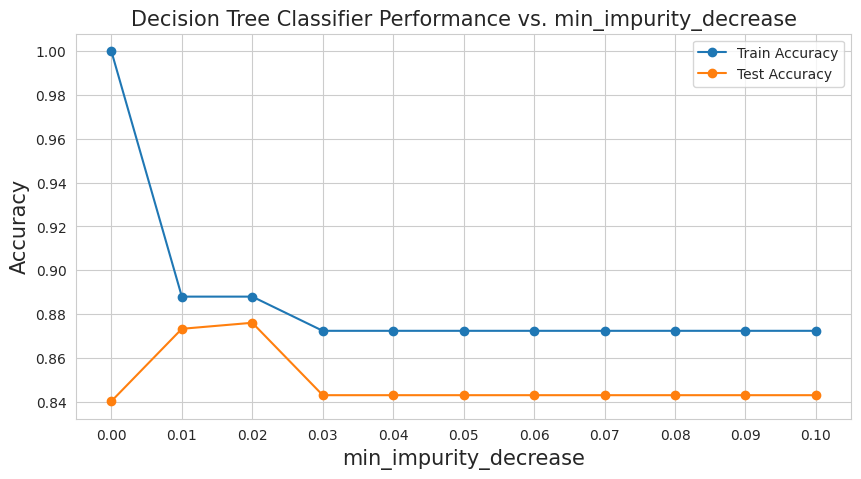

Best value for min_impurity_decrease: 0.02


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy scores
accuracy_train_list = []
accuracy_test_list = []

# Range of min_impurity_decrease values to search (from 0 to 0.1)
min_impurity_decrease_range = [i/100 for i in range(0, 11)]

for impurity_decrease in min_impurity_decrease_range:
    # Create and train the decision tree classifier
    dtc = DecisionTreeClassifier(min_impurity_decrease=impurity_decrease, random_state=42)
    dtc.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plot the accuracy scores for different min_impurity_decrease values
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(min_impurity_decrease_range, accuracy_train_list, label="Train Accuracy", marker='o')
plt.plot(min_impurity_decrease_range, accuracy_test_list, label="Test Accuracy", marker='o')
plt.xlabel("min_impurity_decrease", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("Decision Tree Classifier Performance vs. min_impurity_decrease", size=15)
plt.xticks(min_impurity_decrease_range)
plt.legend()
plt.show()

# Find the best value for min_impurity_decrease based on the maximum test accuracy
best_min_impurity_decrease = min_impurity_decrease_range[accuracy_test_list.index(max(accuracy_test_list))]
print("Best value for min_impurity_decrease:", best_min_impurity_decrease)


In [ ]:
# Create and train the decision tree classifier with min_impurity_decrease=0.01
dtc_mid01 = DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=42)
dtc_mid01.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = dtc_mid01.predict(X_train)
y_test_pred = dtc_mid01.predict(X_test)

# Compute accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Decision tree min_impurity_decrease=0.01. Accuracy - training set:', round(accuracy_train, 2))
print('Decision tree min_impurity_decrease=0.01. Accuracy - testing set:', round(accuracy_test, 2))
print('Depth of the decision tree:', dtc_mid01.get_depth())


Decision tree min_impurity_decrease=0.01. Accuracy - training set: 0.89
Decision tree min_impurity_decrease=0.01. Accuracy - testing set: 0.88
Depth of the decision tree: 2


In [ ]:
from sklearn.ensemble import AdaBoostClassifier # Ada=Adaptive

dtc_ada = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1), n_estimators=5,
        learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=5, random_state=42)

In [ ]:
y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost. Accuracy - training set', round(accuracy_train, 2))
print('AdaBoost. Accuracy - testing set', round(accuracy_test, 2))

# Compare performance to previous performance

AdaBoost. Accuracy - training set 0.89
AdaBoost. Accuracy - testing set 0.87


# Bagging

In [216]:
from sklearn.ensemble import BaggingClassifier

dtc_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=150, random_state=42) # normal to have 50+ estimators

dtc_bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=150,
                  n_estimators=100, random_state=42)

In [217]:
y_train_pred = dtc_bag.predict(X_train)
y_test_pred = dtc_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test_bag = accuracy_score(y_test, y_test_pred)

print('Bagging. Accuracy - training set', round(accuracy_train, 2))
print('Bagging. Accuracy - testing set', round(accuracy_test_bag, 2))

Bagging. Accuracy - training set 0.9
Bagging. Accuracy - testing set 0.88


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest classifier
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_forest = forest_model.predict(X_test)


accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Random Forest Accuracy:", accuracy_forest)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.8953168044077136
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       147
           1       0.88      0.95      0.92       216

    accuracy                           0.90       363
   macro avg       0.90      0.88      0.89       363
weighted avg       0.90      0.90      0.89       363



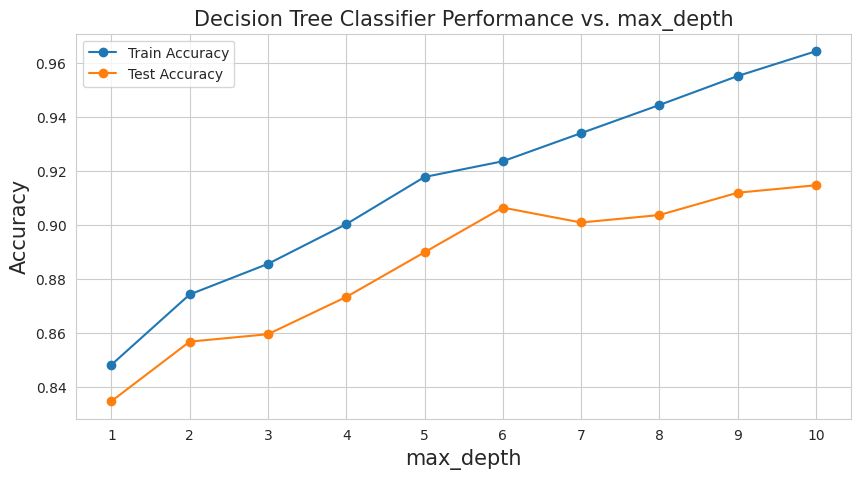

Optimal depth: 10


In [218]:
# Initialize lists to store accuracy scores
accuracy_train_list = []
accuracy_test_list = []

# Range of max_depth values to search
depth_range = range(1, 11)

for depth in depth_range:
    # Create and train the decision tree classifier
    rf_classifier = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to lists
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

# Plot the accuracy scores for different max_depth values
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(depth_range, accuracy_train_list, label="Train Accuracy", marker='o')
plt.plot(depth_range, accuracy_test_list, label="Test Accuracy", marker='o')
plt.xlabel("max_depth", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("Decision Tree Classifier Performance vs. max_depth", size=15)
plt.xticks(depth_range)
plt.legend()
plt.show()

# Find the optimal depth
optimal_depth = depth_range[np.argmax(accuracy_test_list)]
print("Optimal depth:", optimal_depth)

In [219]:
# Create and train the decision tree classifier with max_depth=5
rf_classifier = DecisionTreeClassifier(max_depth=6, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Compute accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

print('Random Forest max_depth=5 accuracy - training set:', round(accuracy_train, 2))
print('Random Forest max_depth=5 accuracy - testing set:', round(accuracy_test_rf, 2))


Random Forest max_depth=5 accuracy - training set: 0.93
Random Forest max_depth=5 accuracy - testing set: 0.88


# XG Boost

In [220]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode string labels into integers
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the testing data
y_pred_encoded = xgb_clf.predict(X_test)

# Decode the integer predictions back to string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_xgb:.2f}")


Accuracy: 0.90


In [185]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode string labels into integers
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train the XGBoost classifier with 10 estimators
xgb_clf = xgb.XGBClassifier(n_estimators=10)
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the testing data
y_pred_encoded = xgb_clf.predict(X_test)

# Decode the integer predictions back to string labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


# Neural Network

In [221]:
# Inputs to neural networks should (almost) always be scaled

from sklearn.preprocessing import StandardScaler

# StandardScaler = z score. Mean = 0, std = 1.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Print the scaled features
print(scaled_features)

[[-0.30068558 -0.08191671  2.4368225  ... -0.31131218  0.12161459
   0.77411864]
 [-0.30068558 -0.19714928 -0.56247077 ...  0.85091858 -1.10607007
   0.35370412]
 [-0.30068558 -1.00377727  2.4368225  ... -0.31131218  0.12161459
   0.77411864]
 ...
 [-0.30068558 -1.00377727 -0.56247077 ...  0.85091858 -1.10607007
   0.35370412]
 [-0.30068558 -1.00377727 -0.56247077 ... -0.83619059 -1.46715379
  -1.37663355]
 [-0.30068558 -0.4852307  -0.56247077 ...  0.4010228   1.78259971
  -0.74822447]]


In [222]:
# Reset input X

X = scaled_features

print(X)
print(y)

[[-0.30068558 -0.08191671  2.4368225  ... -0.31131218  0.12161459
   0.77411864]
 [-0.30068558 -0.19714928 -0.56247077 ...  0.85091858 -1.10607007
   0.35370412]
 [-0.30068558 -1.00377727  2.4368225  ... -0.31131218  0.12161459
   0.77411864]
 ...
 [-0.30068558 -1.00377727 -0.56247077 ...  0.85091858 -1.10607007
   0.35370412]
 [-0.30068558 -1.00377727 -0.56247077 ... -0.83619059 -1.46715379
  -1.37663355]
 [-0.30068558 -0.4852307  -0.56247077 ...  0.4010228   1.78259971
  -0.74822447]]
0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64


In [223]:
# Create training and testing data
from sklearn.model_selection import train_test_split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3267, 36), (363, 36), (3267,), (363,))

In [224]:
# Train neural net with single hidden layer

from sklearn.neural_network import MLPClassifier # MLP = multilayer perceptron

clf = MLPClassifier(hidden_layer_sizes=(6,3), activation='logistic', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

# Network structure
for i, (weights, intercepts) in enumerate(zip(clf.coefs_, clf.intercepts_)):
    print('Hidden layer' if i == 0 else 'Output layer')
    print(' Intercepts:\n ', intercepts)
    print(' Weights:')
    for weight in weights:
        print(' ', weight)
    print()

Hidden layer
 Intercepts:
  [-0.07620182  0.11655897  0.06530514  0.15871748  0.07650036  0.02994836]
 Weights:
  [-0.05474213  0.06086327  0.10122631  0.04940485 -0.13559372 -0.14996448]
  [-0.19282216  0.65627298  0.04411909  0.35974837  0.10228301  0.21070902]
  [ 0.14505528 -0.04444148 -0.13882989 -0.13198271 -0.0777771   0.01093805]
  [-0.02969455  0.01090764  0.04880233 -1.21455168  0.16810627 -0.05379178]
  [-0.01916806  0.21844728 -0.13104188  0.01267738  0.0480358  -0.19776205]
  [ 0.04692524 -0.17912491 -0.1897821   0.24750704  0.22686054  0.13471191]
  [-0.08525322 -0.08492639  0.08038467  0.75283382  0.76821783  0.01578482]
  [-0.20316108  0.7290344  -0.10525352  0.13555789 -0.07388507  0.00910619]
  [ 0.02038118 -0.15036855  0.20489467  0.3368721   0.48227382  0.17734463]
  [ 0.04271687  0.15635057 -0.17955409  0.0696967  -0.14613169 -0.07118186]
  [-0.04857363 -0.02349871  0.14343859 -0.03947749 -0.02895446  0.01912343]
  [-0.15667617  0.10463222 -0.18563718  0.22290876  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [225]:
# PREDICTION

# Training
y_train_pred = clf.predict(X_train)

# Testing
y_test_pred = clf.predict(X_test)

In [226]:
# Accuracy

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test_NN = accuracy_score(y_test, y_test_pred)

print("Accuracy train: ", accuracy_train)
print("Accuracy test", accuracy_test_NN)

Accuracy train:  0.8582797673706765
Accuracy test 0.8429752066115702


In [ ]:
# Neural network description

print('Output nodes:', clf.n_outputs_)
print('Number of layers:', clf.n_layers_)
print('Number of features:', clf.n_features_in_)
print('Classes', clf.classes_)

Output nodes: 1
Number of layers: 3
Number of features: 2
Classes [0 1]


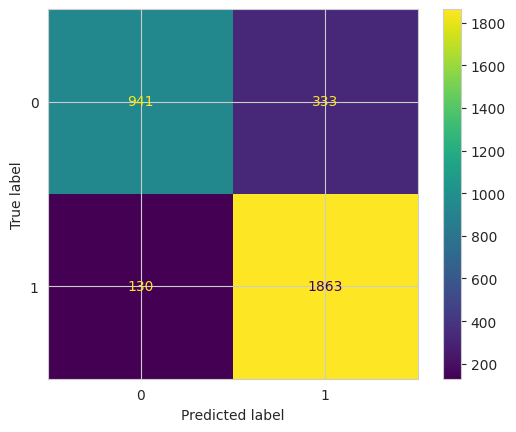

In [231]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

# CNN

In [227]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [228]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import numpy as np
from tensorflow.keras.layers import Input

def CNN(data, labels, test_data, test_labels, stride):
    # Determine number of classes
    num_classes = len(np.unique(labels))

    # Determine size of input data
    input_shape = data.shape[1:]

    # Create the model
    model = Sequential()

    # First convolution layer
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), strides=stride))

    # First maxpooling layer
    model.add(MaxPooling1D(pool_size=2))

    # Second convolution layer
    model.add(Conv1D(64, kernel_size=3, activation='relu'))

    # Second maxpooling layer
    model.add(MaxPooling1D(pool_size=2))

    # Flatten the output from convolution layers
    model.add(Flatten())

    # Dense layer to convert output to 128 values
    model.add(Dense(128, activation='relu'))

    # Final dense layer with softmax activation for classification
    model.add(Dense(num_classes, activation='softmax'))

    # Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Evaluate the model on the test data before training
    score = model.evaluate(test_data, test_labels, verbose=1)
    print('\nKeras CNN accuracy:', score[1], '\n')

    # Fit the model
    history = model.fit(data, labels,
                        shuffle=True,
                        epochs=10,
                        validation_data=(test_data, test_labels))

    # Evaluate the model on the test data after training
    score_CNN = model.evaluate(test_data, test_labels, verbose=1)
    print('\nKeras CNN accuracy:', score_CNN[1], '\n')

    # Predict the labels from test data
    y_pred = model.predict(test_data)
    Y_pred_classes = np.argmax(y_pred, axis=1)
    Y_true = np.argmax(test_labels, axis=1)

    # Confusion matrix
    confusion_mtx = [Y_true, Y_pred_classes]

    # Model summary
    model.summary()

    return model, confusion_mtx, score_CNN[1]


model,conf_mat,score_CNN = CNN(X_train,y_train_cat,X_test,y_test_cat,1);

12/12 [==============================] - 0s 3ms/step - loss: 403.2440 - accuracy: 0.4050

Keras CNN accuracy: 0.40495866537094116 

Epoch 1/10
103/103 [==============================] - 2s 7ms/step - loss: 20.9446 - accuracy: 0.5568 - val_loss: 0.6943 - val_accuracy: 0.8182
Epoch 2/10
103/103 [==============================] - 1s 6ms/step - loss: 4.7190 - accuracy: 0.6520 - val_loss: 1.6206 - val_accuracy: 0.8292
Epoch 3/10
103/103 [==============================] - 1s 6ms/step - loss: 1.3260 - accuracy: 0.8142 - val_loss: 1.9697 - val_accuracy: 0.7879
Epoch 4/10
103/103 [==============================] - 1s 6ms/step - loss: 2.8003 - accuracy: 0.7606 - val_loss: 11.6146 - val_accuracy: 0.4050
Epoch 5/10
103/103 [==============================] - 1s 6ms/step - loss: 2.9003 - accuracy: 0.7857 - val_loss: 2.1934 - val_accuracy: 0.8430
Epoch 6/10
103/103 [==============================] - 1s 9ms/step - loss: 1.9359 - accuracy: 0.8163 - val_loss: 0.8556 - val_accuracy: 0.8843
Epoch 7/10
103

In [229]:
print(score_CNN)
# score_CNN = score_CNN
X.shape

0.8980716466903687


(3630, 36)

# Comparing R2

In [166]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Create linear regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Create decision tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Create random forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Create XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr.predict(X_test)
tree_predictions = tree_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
rf_predictions = forest_model.predict(X_test)

# Compare using R2
lr_r2 = r2_score(y_test, lr_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
rf_R2 = r2_score(y_test, rf_predictions)

print("Logistic regression R2:", lr_r2)
print("Decision Tree R2:", tree_r2)
print("XGBoost R2:", xgb_r2)
print("Random Forest R2:", rf_R2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression R2: 0.17687074829931992
Decision Tree R2: 0.2797619047619049
XGBoost R2: 0.6574959122555168
Random Forest R2: 0.5770030234315949


# Comparing Accuracy

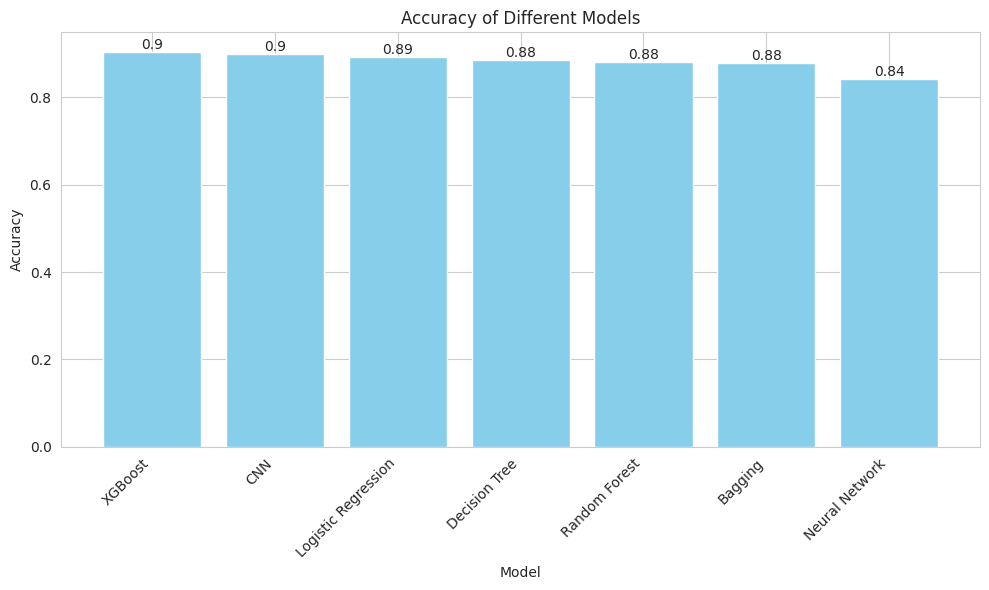

In [230]:
import matplotlib.pyplot as plt

# Accuracy scores from different models
accuracy_scores = {
    'Logistic Regression': accuracy_logreg,
    'Decision Tree': accuracy_test_tree,
    'Bagging': accuracy_test_bag,
    'Random Forest': accuracy_test_rf,
    'XGBoost': accuracy_xgb,
    'Neural Network': accuracy_test_NN,
    'CNN': score_CNN
}

# Sort the accuracy_scores dictionary by values in descending order
accuracy_scores_sorted = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores_sorted.keys(), accuracy_scores_sorted.values(), color='skyblue')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

# Final Analysis

**First Try**

After trying some combinations of feature engineering and fine tuning parameters:


*   Creating polynomial features
*   Eliminating variables high correlated (avoid multicollinearity)
*   Select relevant features with 'SelectFromModel' function (utilizing Random Forest model)


these are the accuracy levels of the models.

We can see a decreased performance in the two deep learning models' accuracy.





**Second Try**

Only polynomial features (final dataset had 702 columns)

Despite training the deep learning models with more entries, we see a huge decrease in their accuracy.

XG Boost has the best accuracy performance.

**Third Try**

Created polynomial features and eliminated high-correlated columns to avoid multicollinearity.

We see a major improvement in the CNN model, which accuracy reaches .82

The best model remians XGBoost with 90% accuracy.

**Fourth Try**

Keeping the dataset as it is without modifying anything.

There is a clear increase in the CNN performance as well as in the Neural Networks.

The best model remains the XGBoost but closely followed by the CNN.

# **Conclusion**


The best accuracy performed by the XGBoost model in our fourth try would be the model to keep.

Even if the model could be better with more training, in our scenario 90% of accuracy is the highest that we could get.

It's intersting to see the poor performance of the deep learning algorithms when feeding with more features.

By keeping the dataset clean, we could get the best performances demonstrating that we it's not always necessary to add more features.

However, in this case, the dataset was clean and ready to work with (no missing values, right datatypes...).

In a real life situation, features engineering would be probably necessary.

